# Test ee.Classifiers

In [28]:
import ee
import pandas as pd
from shapely import wkt
from tqdm.auto import tqdm
import numpy as np
import geedim as gd
import geopandas as gpd
import os
import json
import time

# Initialize Earth Engine
ee.Initialize()

# Define path to snow-cover-mapping
base_path = '/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping'

# Load dataset dictionary
dataset_dict_path = os.path.join(base_path, 'inputs-outputs', 'datasets_characteristics.json')
dataset_dict = json.load(open(dataset_dict_path))

# Load feature columns for Sentinel-2
feature_cols_fn = os.path.join(base_path, 'inputs-outputs', 'Sentinel-2_SR_feature_columns.json')
feature_cols = json.load(open(feature_cols_fn))

# Load the training data for Sentinel-2 SR
csv_path = os.path.join(base_path, 'inputs-outputs', 'Sentinel-2_SR_training_data.csv')
df = pd.read_csv(csv_path)
df['geometry'] = df['geometry'].apply(wkt.loads)
df = df.dropna().reset_index(drop=True)
df

,geometry,Class,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDSI,image_date,site_name
0,POINT (-145.47583358803644 63.29869276752685),1,0.8078,1.0616,1.0568,1.0216,1.0413,0.9419,0.8612,0.8304,0.7680,0.6945,0.0204,0.0175,0.962124,20210615,Gulkana
1,POINT (-145.47480248171345 63.29829180888198),1,0.9267,0.9968,0.9960,0.9552,0.9752,0.9005,0.8218,0.7764,0.7222,0.7241,0.0180,0.0153,0.964497,20210615,Gulkana
2,POINT (-145.4737758211282 63.2978073341598),1,0.9267,1.0032,1.0072,0.9688,0.9864,0.9175,0.8283,0.7874,0.7436,0.7388,0.0179,0.0156,0.965077,20210615,Gulkana
3,POINT (-145.47399379746776 63.29719692452704),1,0.9211,0.9728,0.9664,0.9304,0.9553,0.8826,0.8031,0.7607,0.7222,0.7205,0.0179,0.0154,0.963629,20210615,Gulkana
4,POINT (-145.47475821003803 63.2967873278623),1,0.8937,0.9584,0.9560,0.9192,0.9384,0.8588,0.7861,0.7463,0.7026,0.6993,0.0168,0.0146,0.965461,20210615,Gulkana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11719,POINT (-148.84578252425018 60.45585137160915),4,0.0824,0.0792,0.0904,0.0977,0.1390,0.1490,0.1827,0.1444,0.1781,0.2015,0.2276,0.1789,-0.431447,20210829,Wolverine
11720,POINT (-148.83986670991106 60.44823404793804),4,0.0559,0.0718,0.0970,0.1002,0.1034,0.1023,0.1033,0.1070,0.1008,0.0994,0.0872,0.0787,0.053203,20210829,Wolverine
11721,POINT (-148.83842397451642 60.44994111031941),4,0.1515,0.0800,0.0895,0.0940,0.0919,0.0969,0.0833,0.0905,0.0958,0.1613,0.0489,0.0458,0.293353,20210829,Wolverine
11722,POINT (-148.86030074413614 60.447237482071706),4,0.0324,0.0592,0.0760,0.0691,0.0464,0.0443,0.0481,0.0719,0.0502,0.0497,0.0317,0.0284,0.411328,20210829,Wolverine


In [23]:
# Create a list of ee.Feature objects from the training data DataFrame
features = []
for index, row in df.iterrows():
    dict = dict = row.to_dict()
    if 'geometry' in dict.keys(): 
        del dict['geometry']
    point = ee.Geometry.Point(row['geometry'].coords.xy[0][0], row['geometry'].coords.xy[1][0])
    feature = ee.Feature(point, dict)
    features.append(feature)

# Create an ee.FeatureCollection from the list of features
fc = ee.FeatureCollection(features)

# Add an index property to each feature
def add_index(feature):
    index = feature.get('system:index')
    return feature.set('index', index)
fc_indexed = fc.map(add_index)

In [25]:
fc_indexed.aggregate_array('index').getInfo()

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [9]:
# Define classifiers to test
classifiers = [
    ee.Classifier.smileRandomForest(10),
    ee.Classifier.libsvm(),
    ee.Classifier.minimumDistance(),
    ee.Classifier.smileCart(),
    ee.Classifier.smileNaiveBayes(),
]

classifier_names = [
    'Random Forest',
    'Support Vector Machine', 
    'Minimum Distance',
    'CART',
    'NaiveBayes'
]

In [13]:
# -----Assess classifier accuracy using K-folds cross-validation
features_per_fold = fc_indexed.size().divide(num_folds).floor().getInfo()
print('Features per fold:', features_per_fold)

# mean_accuracy = ee.List([])
for name, classifier in list(zip(classifier_names, classifiers)):

    print(name)
    
    # Perform K-fold cross-validation
    accuracy_list = ee.List([])
    for fold in tqdm(range(num_folds)):

        # Calculate the starting and ending index for the testing set
        start_index = fold * features_per_fold
        end_index = start_index + features_per_fold
        
        # Define the testing and training sets based on the start and end index
        testing_set = fc_indexed.filter(ee.Filter.rangeContains('index', start_index, end_index))
        training_set = fc_indexed.filter(ee.Filter.inList('index', testing_set.aggregate_array('index').map(lambda i: ee.Number(i)).map(lambda i: i.floor()).distinct().toList().map(lambda i: i.floor()), True))
        
        # Train the classifier using the training data
        trained_classifier = classifier.train(training_set, 'Class', feature_cols)
    
        # Assess the accuracy of the classifier using the testing data
        test_accuracy = testing_set.classify(trained_classifier).errorMatrix('Class', 'classification')
        accuracy = ee.Number(test_accuracy.accuracy())
        
        # Append the accuracy to the accuracy list
        accuracy_list = accuracy_list.add(accuracy)

    # Calculate the mean accuracy using a custom reduction function
    print(accuracy_list.getInfo())

    print(' ')

# -----Identify best classifier
ibest = np.argwhere(mean_accuracy==np.nanmin(mean_accuracy))
best_classifier = classifiers[ibest]
best_classifier_name = classifier_names[ibest]
print('Best classifier: ', best_classifier_name)

Features per fold: 1172
Random Forest


  0%|          | 0/10 [00:00<?, ?it/s]

AttributeError: 'ComputedObject' object has no attribute 'floor'

In [19]:
# Define the K-Folds parameters
k = 5  # Number of folds
fold_index = 0  # The current fold index (0-based)

# Select the training set
training_set = fc_indexed.filter(ee.Filter.neq('index', fold_index))

# Select the testing set
testing_set = fc_indexed.filter(ee.Filter.eq('index', fold_index))

# Print information about the training and testing sets
print("Training Set:")
print(training_set.size().getInfo())
print("\nTesting Set:")
print(testing_set.size().getInfo())

Training Set:
11724

Testing Set:
0


In [26]:
# -----Retrain best classifier with full dataset
classifier_trained = ee.Classifier.smileCart().train(features=fc, 
                                                     classProperty='Class', 
                                                     inputProperties=feature_cols)

In [27]:
def query_gee_for_imagery(aoi_utm, dataset, date_start, date_end, cloud_cover_max, mask_clouds):
    
    # -----Reformat AOI for image filtering
    # reproject CRS from AOI to WGS
    aoi_wgs = aoi_utm.to_crs('EPSG:4326')
    # prepare AOI for querying geedim (AOI bounding box)
    region = {'type': 'Polygon',
              'coordinates': [[[aoi_wgs.geometry.bounds.minx[0], aoi_wgs.geometry.bounds.miny[0]],
                               [aoi_wgs.geometry.bounds.maxx[0], aoi_wgs.geometry.bounds.miny[0]],
                               [aoi_wgs.geometry.bounds.maxx[0], aoi_wgs.geometry.bounds.maxy[0]],
                               [aoi_wgs.geometry.bounds.minx[0], aoi_wgs.geometry.bounds.maxy[0]],
                               [aoi_wgs.geometry.bounds.minx[0], aoi_wgs.geometry.bounds.miny[0]]
                               ]]}

    # -----Query GEE for imagery
    print('Querying GEE for ' + dataset + ' imagery...')
    if dataset == 'Landsat':
        # Landsat 8
        im_col_gd_8 = gd.MaskedCollection.from_name('LANDSAT/LC08/C02/T1_L2').search(start_date=date_start,
                                                                                     end_date=date_end,
                                                                                     region=region,
                                                                                     cloudless_portion=100 - cloud_cover_max,
                                                                                     mask=mask_clouds,
                                                                                     fill_portion=70)
        # Landsat 9
        im_col_gd_9 = gd.MaskedCollection.from_name('LANDSAT/LC09/C02/T1_L2').search(start_date=date_start,
                                                                                     end_date=date_end,
                                                                                     region=region,
                                                                                     cloudless_portion=100 - cloud_cover_max,
                                                                                     mask=mask_clouds,
                                                                                     fill_portion=70)
    elif dataset == 'Sentinel-2_TOA':
        im_col_gd = gd.MaskedCollection.from_name('COPERNICUS/S2_HARMONIZED').search(start_date=date_start,
                                                                                     end_date=date_end,
                                                                                     region=region,
                                                                                     cloudless_portion=100 - cloud_cover_max,
                                                                                     mask=mask_clouds,
                                                                                     fill_portion=70)
    elif dataset == 'Sentinel-2_SR':
        im_col_gd = gd.MaskedCollection.from_name('COPERNICUS/S2_SR_HARMONIZED').search(start_date=date_start,
                                                                                        end_date=date_end,
                                                                                        region=region,
                                                                                        cloudless_portion=100 - cloud_cover_max,
                                                                                        mask=mask_clouds,
                                                                                        fill_portion=70)
    else:
        print("'dataset' variable not recognized. Please set to 'Landsat', 'Sentinel-2_TOA', or 'Sentinel-2_SR'. "
              "Exiting...")
        return 'N/A'

    # grab ee.ImageCollection from geedim Masked Collection
    im_col_ee = im_col_gd.ee_collection

    # Account for image scalar
    def apply_image_scalar(image):
        return image.divide(10000)
    im_col_ee = im_col_ee.map(apply_image_scalar)
    
    # Add NDSI band
    def add_ndsi_band(image):
        ndsi = image.expression(
            '(green - swir) / (green + swir)', 
            {
                'green': image.select('B3'),  
                'swir': image.select('B11')   
            })
        return image.addBands(ndsi.rename('NDSI'))
    im_col_ee = im_col_ee.map(add_ndsi_band)

    return im_col_ee, region

In [49]:
export_path = os.path.join('/Users', 'raineyaberle', 'Google Drive', 'My Drive', 'GEE_exports')
fns = os.listdir(export_path)
# for fn in fns:
#     os.remove(os.path.join(export_path, fn))
fns

[]

In [50]:
# -----Query GEE for Sentinel-2 SR images over Wolverine
# load AOI
AOI_path = ('/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/Wolverine/AOIs/')
AOI_fn = 'Wolverine_RGI_outline.shp'
AOI = gpd.read_file(os.path.join(AOI_path, AOI_fn))
# query gee for imagery
date_start = '2023-09-01'
date_end = '2023-10-01'
dataset = "Sentinel-2_SR"
cloud_cover_max = 100
mask_clouds = True

t1 = time.time()

image_collection, region = query_gee_for_imagery(AOI, dataset, date_start, date_end, cloud_cover_max, mask_clouds)
print('Images found = ', image_collection.size().getInfo())

# -----Classify images
def classify_image(image):
    # Classify the image using the trained classifier
    classified = image.classify(classifier_trained)
    # Return the image with classification results as a band
    return image.addBands(classified.rename('classification'))

# Apply the classifier to the entire image collection
print('Classifying images...')
classified_collection = image_collection.map(classify_image)

# Select only the classified image band
bands = ['classification']
scale = 10
def select_classification_band(image):
    return image.select('classification')
classified_collection_band = classified_collection.map(select_classification_band)

# Download classified image to file
print('Downloading classified images to file...')
image_list = classified_collection_band.toList(classified_collection_band.size())
for i in range(image_list.size().getInfo()):
    out_fn = os.path.join(export_path, 'Wolverine_' + str(i)+'.tif')
    if not os.path.exists(out_fn):
        image = gd.MaskedImage(ee.Image(image_list.get(i)))
        image.download(out_fn, scale=scale, region=region)
    else:
        print('Image already downloaded to file, skipping...')

t2 = time.time()

print('\nTime elapsed = ' + str(np.round((t2-t1) / 60 ,5)) + ' min')

Querying GEE for Sentinel-2_SR imagery...
Images found =  2
Classifying images...


Wolverine_0.tif: |             | 0.00/3.01M (raw) [  0.0%] in 00:00 (eta:     ?)

Wolverine_1.tif: |             | 0.00/3.01M (raw) [  0.0%] in 00:00 (eta:     ?)


Time elapsed = 3.23298 min


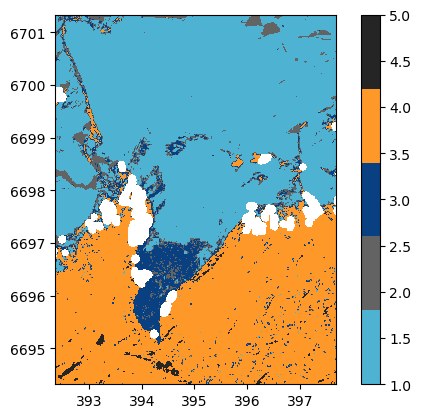

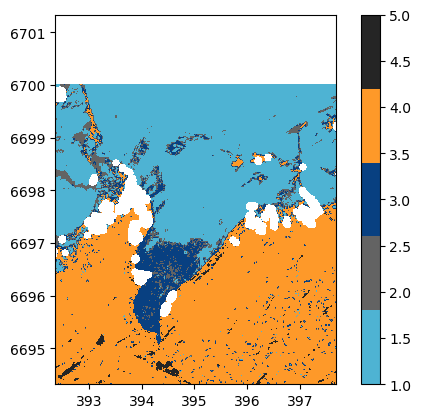

In [51]:
# Plot classified images
import matplotlib
import xarray as xr
import matplotlib.pyplot as plt

fns = sorted(os.listdir(export_path))
fns
colors = ["#4eb3d3", "#636363", "#084081", "#fe9929", "#252525"]
cmp = matplotlib.colors.ListedColormap(colors)

for fn in fns:
    image = xr.open_dataset(os.path.join(export_path, fn))
    image = xr.where((image < 1) | (image > 5), np.nan, image)
    plt.imshow(image.band_data.data[0], clim=(1,5), cmap=cmp,
          extent=(np.min(image.x.data)/1e3, np.max(image.x.data)/1e3, 
                  np.min(image.y.data)/1e3, np.max(image.y.data)/1e3))
    colorbar = plt.colorbar()
    plt.show()

In [52]:
image.x.data[1] - image.x.data[0]

10.0